# Project Definition

This is a classification supervised machine learning using KNN model to classify records into 2 groups of **On time delivery** and **Delayed delivery**. The dataset,_Supply Chain Shipment Pricing Data_, used to train the model has been downloaded form data.gov. The data set identifies Antiretroviral (ARV) and HIV lab shipments to supported countries.The data are particularly valuable for understanding ranges and trends in pricing, shipment schedule as well as volumes delivered by country.

# Steps 

According to CRISP-DM process the steps of performing the modeling is as follows:
1. Business Undrestanding 
1. Data Undrestanding
1. Data Preparation
1. Modeling

##### Step 1: _imporing required libraries:_

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import pandasgui
from datetime import timedelta

from sklearn.impute import SimpleImputer 
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# from skfeature.function.similarity_based import fisher_score


##### Step 2: _importing data_

In [6]:
dta=pd.read_csv("C:/Users/Lenovo/Desktop/Edition 2 -Supply_Chain_Shipment_Pricing_Data.csv")

# Data Undrestanding

##### Step 3: _Trying to Undrestand the data using methods like: head, info, columns, describe ,etc._

In [40]:
dta.head(3)

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,id,country,managed by,fulfill via,vendor inco term,shipment mode,pq first sent to client date,po sent to vendor date,scheduled delivery date,delivered to client date,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
1,Explaination of the feature,Destination country,SCMS managing office: either the Program Manag...,Method through which the shipment was fulfille...,The vendor INCO term (also known as Internatio...,Method by which commodities are shipped,Date the PQ is first sent to the client,Date the PO is first sent to the vendor,Current anticipated delivery date,Date of delivery to client,...,Pack quantity (pills or test kits) used to com...,Total quantity (packs) of commodity per line item,Total value of commodity per line item,"Cost per pack (i.e. month s supply of ARVs, pa...",Cost per pill (for drugs) or per test (for tes...,Identifies manufacturing site for the line ite...,Designates if the line in question shows the a...,Weight for all lines on an ASN DN,Freight charges associated with all lines on t...,"Line item cost of insurance, created by applyi..."
2,1,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,...,30,19,551,29,0.97,Ranbaxy Fine Chemicals LTD,TRUE,13,780.34,NaN


In [41]:
dta.index

RangeIndex(start=0, stop=10326, step=1)

In [42]:
dta.columns

Index(['Unnamed: 0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27'],
      dtype='object')

In [43]:
dta.shape

(10326, 28)

In [215]:
dta.columns

Index(['country', 'managed by', 'fulfill via', 'vendor inco term',
       'shipment mode', 'po sent to vendor date', 'scheduled delivery date',
       'delivered to client date', 'delivery recorded date', 'product group',
       'sub classification', 'vendor', 'molecule/test type', 'brand', 'dosage',
       'dosage form', 'unit of measure (per pack)', 'line item quantity',
       'line item value', 'pack price', 'unit price', 'manufacturing site',
       'first line designation', 'weight (kilograms)', 'freight cost (usd)',
       'line item insurance (usd)'],
      dtype='object', name=0)

## EDA via PandasGUI

In [62]:
import pandasgui
da=pd.read_csv("C:/Users/Lenovo/Desktop/dta for EDA 1.csv")
da14=pd.read_csv("C:/Users/Lenovo/Desktop/dta for EDA 14.csv")
da=pd.concat([da,da14.iloc[:,-1]])
notorg=['shipment mode', 'ARV', 'for Adult','line item value', 'unit price','weight (kilograms)','freight cost (usd)', 'line item insurance (usd)', 'On time']
org=['country', 'fulfill via','vendor inco term','vendor', 'molecule/test type','dosage form', 'manufacturing site']
da4=pd.DataFrame()
for i in org:
    da4=pd.concat([da4,da.loc[:,i]],axis=1)
for i in notorg:
    da4=pd.concat([da4,da14.loc[:,i]],axis=1)
pandasgui.show(da4)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI
C:\Users\Lenovo\anaconda3\lib\site-packages\pandasgui\widgets\column_viewer.py:107: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [str(sources[i]), str(source_nunique[i]), str(source_types[i])])
C:\Users\Lenovo\anaconda3\lib\site-packages\pandasgui\widgets\column_viewer.py:107: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [str(sources[i]), str(source_nunique[i]), str(source_types[i])])
C:\Users\Lenovo\anaconda3\lib\site-packages\pandasgui\widgets\column_viewer.py:107: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, i

##### Step 4: _omitting redundant rows and columns in the original csv file_

In [7]:
dta.columns=dta.iloc[0,:]
dta=dta.iloc[2:,1:]
dta=dta.drop('pq first sent to client date',axis=1)
dta.index=np.arange(dta.shape[0])

In [4]:
dta.head(4)

,country,managed by,fulfill via,vendor inco term,shipment mode,po sent to vendor date,scheduled delivery date,delivered to client date,delivery recorded date,product group,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,...,30,19,551,29,0.97,Ranbaxy Fine Chemicals LTD,TRUE,13,780.34,NaN
1,Vietnam,PMO - US,Direct Drop,EXW,Air,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,...,240,1000,6200,6.2,0.03,"Aurobindo Unit III, India",TRUE,358,4521.5,NaN
2,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,...,100,500,40000,80,0.8,ABBVIE GmbH & Co.KG Wiesbaden,TRUE,171,1653.78,NaN
3,Vietnam,PMO - US,Direct Drop,EXW,Air,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",TRUE,1855,16007.06,NaN


In [47]:
dta.columns

Index(['country', 'managed by', 'fulfill via', 'vendor inco term',
       'shipment mode', 'po sent to vendor date', 'scheduled delivery date',
       'delivered to client date', 'delivery recorded date', 'product group',
       'sub classification', 'vendor', 'molecule/test type', 'brand', 'dosage',
       'dosage form', 'unit of measure (per pack)', 'line item quantity',
       'line item value', 'pack price', 'unit price', 'manufacturing site',
       'first line designation', 'weight (kilograms)', 'freight cost (usd)',
       'line item insurance (usd)'],
      dtype='object', name=0)

In [4]:
for i in range(0,dta.shape[1]):
    print('feature {}: NaN: {}'.format(dta.columns[i],sum(dta.iloc[:,i].isna())))

feature country: NaN: 0
feature managed by: NaN: 0
feature fulfill via: NaN: 0
feature vendor inco term: NaN: 0
feature shipment mode: NaN: 360
feature po sent to vendor date: NaN: 0
feature scheduled delivery date: NaN: 0
feature delivered to client date: NaN: 0
feature delivery recorded date: NaN: 0
feature product group: NaN: 0
feature sub classification: NaN: 0
feature vendor: NaN: 0
feature molecule/test type: NaN: 0
feature brand: NaN: 0
feature dosage: NaN: 1736
feature dosage form: NaN: 0
feature unit of measure (per pack): NaN: 0
feature line item quantity: NaN: 0
feature line item value: NaN: 0
feature pack price: NaN: 0
feature unit price: NaN: 0
feature manufacturing site: NaN: 0
feature first line designation: NaN: 0
feature weight (kilograms): NaN: 0
feature freight cost (usd): NaN: 0
feature line item insurance (usd): NaN: 287


##### Step 5: _evaluating categorical features_

In [8]:
dta.loc[:,'country'] .unique()

array(["Côte d'Ivoire", 'Vietnam', 'Nigeria', 'Zambia', 'Tanzania',
       'Rwanda', 'Haiti', 'Zimbabwe', 'Ethiopia', 'South Africa',
       'Guyana', 'Namibia', 'Botswana', 'Mozambique', 'Kenya',
       'Kazakhstan', 'Uganda', 'Kyrgyzstan', 'Senegal', 'Benin',
       'Lesotho', 'Pakistan', 'Swaziland', 'Ghana', 'Angola', 'Lebanon',
       'Sierra Leone', 'Cameroon', 'South Sudan', 'Burundi',
       'Dominican Republic', 'Malawi', 'Congo, DRC', 'Sudan', 'Mali',
       'Guatemala', 'Togo', 'Afghanistan', 'Liberia', 'Burkina Faso',
       'Guinea', 'Libya', 'Belize'], dtype=object)

In [9]:
for i in range(0,5):
    a=dta.iloc[:,i].value_counts()
    print("********",dta.columns[i],"*******")
    print(a,'\n','\n','\n')

******** country *******
country
South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Guatemala               15
Pakistan                15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Sierra Leone             4
Lesotho                  4
Senegal               

# DATA PREPARATION


##### Step 6: _assign countries with less than 400 orders to class "others"_

In [10]:
dta2=dta
for i in range(0,dta2.shape[0]):
    if not( dta2.iloc[i,0] in ["South Africa","Nigeria","Côte d'Ivoire","Uganda,Vietnam","Zambia","Haiti","Mozambique","Zimbabwe","Tanzania","Rwanda"]):      
        dta2.iloc[i,0]= "others"

In [51]:
dta2.country.value_counts()

others           3185
South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Tanzania          519
Rwanda            430
Name: country, dtype: int64

##### Step 7: _considering variable "managed by" defines no variance, we decide to omit it_

In [11]:
dta2.iloc[:,1].value_counts()
dta3=dta2.drop('managed by', axis=1)

##### Step 8: _shipment mode:assign orders with less than 2000 freq to class "others"_

In [53]:
#dta14.loc[:,'shipment mode'].value_counts()

In [54]:
#for i in range(0,dta3.shape[0]):
#     if not( dta3.loc[i,'shipment mode'] in ['Air','Truck']):      
#         dta3.loc[i,'shipment mode']= "others"

##### Step 9: _vendor inco term :assign orders with less than 300 frequency to class "others"_

In [12]:
for i in range(0,dta3.shape[0]):
    if not( dta3.iloc[i,2] in ["N/A - From RDC","EXW","DDP","FCA"]):      
        dta3.iloc[i,2]= "others"

dta3.iloc[:,2].value_counts()

vendor inco term
N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
others             302
Name: count, dtype: int64

In [12]:
#dta3.to_csv("C:/Users/Lenovo/Desktop/myDataaa.csv")

##### Step 10: _changing type of variables definig dates from "object" to "dates"_

In [44]:
dta4.head()

,country,fulfill via,vendor inco term,shipment mode,po sent to vendor date,scheduled delivery date,delivered to client date,delivery recorded date,product group,sub classification,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,Côte d'Ivoire,Direct Drop,EXW,Air,NaT,2006-06-02,2006-06-02,2006-06-02,HRDT,HIV test,...,30,19,551,29,0.97,Ranbaxy Fine Chemicals LTD,TRUE,13,780.34,NaN
1,others,Direct Drop,EXW,Air,NaT,2006-11-14,2006-11-14,2006-11-14,ARV,Pediatric,...,240,1000,6200,6.2,0.03,"Aurobindo Unit III, India",TRUE,358,4521.5,NaN
2,Côte d'Ivoire,Direct Drop,FCA,Air,NaT,2006-08-27,2006-08-27,2006-08-27,HRDT,HIV test,...,100,500,40000,80,0.8,ABBVIE GmbH & Co.KG Wiesbaden,TRUE,171,1653.78,NaN
3,others,Direct Drop,EXW,Air,NaT,2006-09-01,2006-09-01,2006-09-01,ARV,Adult,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",TRUE,1855,16007.06,NaN
4,others,Direct Drop,EXW,Air,NaT,2006-08-11,2006-08-11,2006-08-11,ARV,Adult,...,60,38000,121600,3.2,0.05,"Aurobindo Unit III, India",TRUE,7590,45450.08,NaN


In [13]:
dta4=dta3.copy()
dta4.iloc[:,4]=pd.to_datetime(dta4.iloc[:,4],errors='coerce',format='%m/%d/%Y')
for i in [5,6,7]:
    dta4.iloc[:,i]=pd.to_datetime(dta4.iloc[:,i],errors='coerce',format='%d-%b-%y')


##### Step 11: _Defining a new binary feature:  ARV_


In [14]:
dta5=dta4.copy()
dta5.loc[dta5['product group']=='ARV', 'product group'] = 1
dta5.loc[dta5['product group']!=1, 'product group'] = 0
dta5.rename(columns={dta5.columns[8]: 'ARV'}, inplace=True)

##### Step 12: _Defining a new binary feature :for Adult_


In [15]:
dta7=dta5.copy()
dta7.loc[ dta7["sub classification"]=='Adult',"sub classification"] =1 
dta7.loc[ dta7["sub classification"]!=1,"sub classification"] =0
dta7.rename(columns={dta7.columns[dta7.columns.to_list().index('sub classification')]: 'for Adult'}, inplace=True)

##### Step 13: _assign vendors with less than 250 orders to class "others"_

In [16]:
dta8=dta7.copy()
d=(dta7.iloc[:,10].value_counts())
#d[d>100]
for i in range(0,dta8.shape[0]):
    if not( dta8.iloc[i,10] in ['SCMS from RDC','Orgenics', 'Ltd','S. BUYS WHOLESALER','Aurobindo Pharma Limited','Trinity Biotech, Plc','ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)','PHARMACY DIRECT','MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES)','HETERO LABS LIMITED']):      
        dta8.iloc[i,10]= "others"
dta8.iloc[:,10].value_counts()
dta8=dta8.drop('brand',axis=1)

##### Step 14: _assign  molecule/test type with less than 250 freq to class "others"_

In [17]:
dta10=dta8.copy()
for i in range(0,dta10.shape[0]):
    if not( dta10.iloc[i,11] in ['Efavirenz','Nevirapine','Lamivudine/Nevirapine/Zidovudine','Lamivudine/Zidovudine','Lopinavir/Ritonavir','Lamivudine','HIV 1/2, Determine Complete HIV Kit','Zidovudine','Abacavir','HIV 1/2, Uni-Gold HIV Kit','Tenofovir Disoproxil Fumarate','Lamivudine/Tenofovir Disoproxil Fumarate','Lamivudine/Nevirapine/Stavudine','Efavirenz/Lamivudine/Tenofovir Disoproxil Fumarate','Stavudine','Didanosine','Emtricitabine/Tenofovir Disoproxil Fumarate'] ):      
        dta10.iloc[i,11]= "others"
dta10=dta10.drop('dosage',axis=1)

##### Step 15: _assign  dosage form with less than 500 freq to class "others"_

In [18]:
dta11=dta10.copy()
for i in range(0,dta11.shape[0]):
    if not( dta11.iloc[i,12] in['Tablet','Tablet - FDC','Test kit','Capsule','Oral solution']):
           dta11.iloc[i,12]= "others"

##### Step 16: _omit redundant columns_

In [19]:
dta11=dta11.drop('line item quantity',axis=1)
dta11=dta11.drop('unit of measure (per pack)',axis=1)
dta11=dta11.drop('pack price',axis=1)
dta11=dta11.drop('first line designation',axis=1)

##### Step 17: _assign  'manufacturing site' with less than 400 freq to class "others"_

In [79]:
dta12.columns[15]

'manufacturing site'

In [20]:
dta12=dta11.copy()

for i in range(0,dta12.shape[0]):
    if not( dta12.iloc[i,15] in ['Aurobindo Unit III, India','Mylan (formerly Matrix) Nashik','Hetero Unit III Hyderabad IN','Cipla, Goa, India','Strides, Bangalore, India.','Alere Medical Co., Ltd.','Trinity Biotech, Plc']):
           dta12.iloc[i,15]= "others"

In [81]:
dta12.iloc[:,15].value_counts()

manufacturing site
Aurobindo Unit III, India         3172
others                            2777
Mylan (formerly Matrix) Nashik    1415
Hetero Unit III Hyderabad IN       869
Cipla, Goa, India                  665
Strides, Bangalore, India.         540
Alere Medical Co., Ltd.            481
Trinity Biotech, Plc               405
Name: count, dtype: int64

## Target Variable 

##### Step 18: defining the response variable: whether the delivery has been on time or in time: as class 1, 0 otherwise


In [21]:
dates_details=pd.DataFrame({
    'Delivered to client date' : dta4.iloc[:,6],
    'Scheduled delivery date': dta4.iloc[:,5],
    'dif':(dta4.iloc[:,6]-  dta4.iloc[:,5])})
# from datetime import timedelta
dates_details_positive = dates_details[dates_details['dif'] > timedelta(days=0)]
dta13=dta12.copy()
dta13.loc[:,'On time']=np.nan
dates_details_positive = dates_details[dates_details['dif'] > timedelta(days=0)]
dta13.loc[ dates_details['dif'] <= timedelta(days=0)  ,'On time']=1
dta13.loc[ dates_details['dif'] > timedelta(days=0) ,'On time']=0
print (' {e} orders has been delivered early(intime) and {o} orders have been delievered ontime.\n {l} orders have been delivered with delay.\n Total number of orders:{t}'.format(e=sum(dates_details['dif'] < timedelta(days=0)) , l=sum(dates_details['dif'] > timedelta(days=0)), o=sum(dates_details['dif'] == timedelta(days=0)),t=dta13.shape[0]))

 2814 orders has been delivered early(intime) and 6324 orders have been delievered ontime.
 1186 orders have been delivered with delay.
 Total number of orders:10324


In [18]:
dates_details.tail()

,Delivered to client date,Scheduled delivery date,dif
10319,2015-07-15 00:00:00,2015-07-31 00:00:00,-16 days +00:00:00
10320,2015-08-06 00:00:00,2015-07-31 00:00:00,6 days 00:00:00
10321,2015-08-25 00:00:00,2015-08-31 00:00:00,-6 days +00:00:00
10322,2015-08-04 00:00:00,2015-09-09 00:00:00,-36 days +00:00:00
10323,2015-08-04 00:00:00,2015-08-31 00:00:00,-27 days +00:00:00


In [85]:
dates_details['dif'] >= timedelta(days=0)

0         True
1         True
2         True
3         True
4         True
         ...  
10319    False
10320     True
10321    False
10322    False
10323    False
Name: dif, Length: 10324, dtype: bool

In [22]:
dta14=dta13.copy()
for i in ['po sent to vendor date','scheduled delivery date', 'delivered to client date','delivery recorded date']:
    dta14=dta14.drop(i,axis=1)
for i in [9,10,12,13,14]:dta14.iloc[:,i]= pd.to_numeric(dta14.iloc[:,i], errors='coerce')

In [24]:
# dta14.to_csv("C:/Users/Lenovo/Desktop/dta for EDA 14.csv")

## Outlier Detection

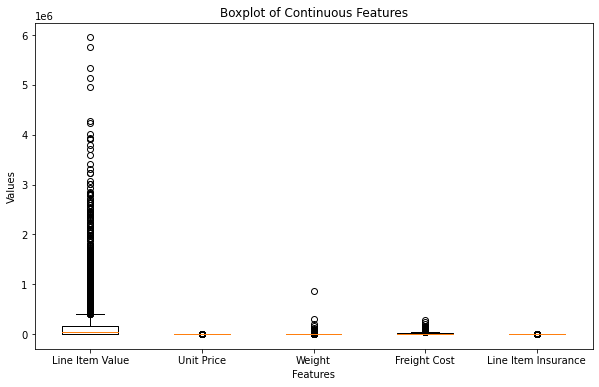

In [23]:
line_item_value = pd.to_numeric(dta14.iloc[:, 9], errors='coerce').dropna()
unit_price = pd.to_numeric(dta14.iloc[:, 10], errors='coerce').dropna()
weight = pd.to_numeric(dta14.iloc[:, 12], errors='coerce').dropna()
freight_cost = pd.to_numeric(dta14.iloc[:, 13], errors='coerce').dropna()
line_item_insurance = pd.to_numeric(dta14.iloc[:, 14], errors='coerce').dropna()

features = [line_item_value, unit_price, weight, freight_cost, line_item_insurance]

plt.figure(figsize=(10, 6))
plt.boxplot(features, labels=['Line Item Value', 'Unit Price', 'Weight', 'Freight Cost', 'Line Item Insurance'])
plt.title('Boxplot of Continuous Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


### Outlier Detection and Nullify it 

In [5]:
dta14.columns

NameError: name 'dta14' is not defined

In [24]:
def nullify_outliers(data):
    Q1 = np.percentile((data).dropna(), 25)
    Q3 = np.percentile(data.dropna(), 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    nullified_data = np.where((data < lower_bound) | (data > upper_bound), np.nan, data)
    return nullified_data
dta15_cont=pd.DataFrame({
    'line_item_value' : pd.to_numeric(dta14.loc[:,'line item value'], errors='coerce'),
    'unit_price' : pd.to_numeric(dta14.loc[:, 'unit price'], errors='coerce'),
    'weight' : pd.to_numeric(dta14.loc[:,   'weight (kilograms)'], errors='coerce'),
    'freight_cost' : pd.to_numeric(dta14.loc[:, 'freight cost (usd)'], errors='coerce'),
    'line_item_insurance' : pd.to_numeric(dta14.loc[:, 'line item insurance (usd)'], errors='coerce')})
dta15_cont_cleaned=dta15_cont.copy()

for i in range(4):
    dta15_cont_cleaned.iloc[:,i]=nullify_outliers(dta15_cont.iloc[:,i])
dta15=pd.concat([dta14.iloc[:,[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  11, 15]],dta15_cont_cleaned],axis=1)

In [25]:
dta15_cont.describe() #Before

,line_item_value,unit_price,weight,freight_cost,line_item_insurance
count,1.032400e+04,10324.000000,6372.000000,6198.000000,10037.000000
mean,1.576506e+05,0.611701,3424.441306,11103.234819,240.117626
std,3.452921e+05,3.275808,13526.968270,15813.026692,500.190568
min,0.000000e+00,0.000000,0.000000,0.750000,0.000000
25%,4.314593e+03,0.080000,206.750000,2131.120000,6.510000
50%,3.047147e+04,0.160000,1047.000000,5869.655000,47.040000
75%,1.664471e+05,0.470000,3334.000000,14406.570000,252.400000
max,5.951990e+06,238.650000,857354.000000,289653.200000,7708.440000


In [208]:
dta15_cont_cleaned.describe()  #After

,line_item_value,unit_price,weight,freight_cost,line_item_insurance
count,9197.000000,9444.000000,5749.000000,5810.000000,10037.000000
mean,68444.601024,0.252289,1586.083319,8061.305084,240.117626
std,95163.119035,0.258073,1881.272511,7732.095373,500.190568
min,0.000000,0.000000,0.000000,0.750000,0.000000
25%,3290.000000,0.070000,169.000000,1945.105000,6.510000
50%,21000.000000,0.140000,807.000000,5221.335000,47.040000
75%,98784.000000,0.350000,2393.000000,12078.315000,252.400000
max,408815.920000,1.050000,8016.000000,32728.960000,7708.440000


In [26]:
dta15_for_boxplot = dta15_cont_cleaned.dropna()

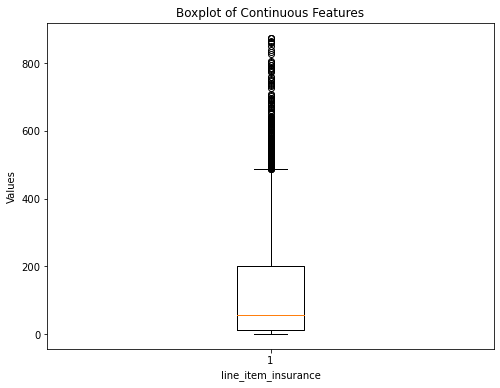

In [41]:
plt.figure(figsize=(8, 6))
plt.boxplot(dta15_for_boxplot.iloc[:, 4]);
plt.title('Boxplot of Continuous Features')
plt.xlabel('line_item_insurance')
plt.ylabel('Values')
plt.show()

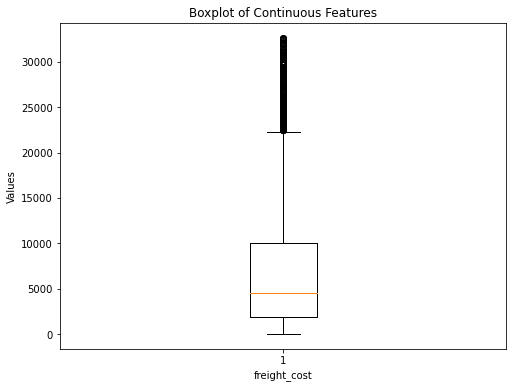

In [211]:
plt.figure(figsize=(8, 6))
plt.boxplot(dta15_for_boxplot.iloc[:, 3]);
plt.title('Boxplot of Continuous Features')
plt.xlabel('freight_cost')
plt.ylabel('Values')
plt.show()

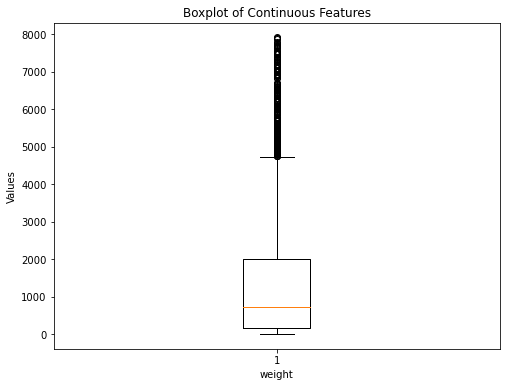

In [212]:
plt.figure(figsize=(8, 6))
plt.boxplot(dta15_for_boxplot.iloc[:, 2]);
plt.title('Boxplot of Continuous Features')
plt.xlabel('weight')
plt.ylabel('Values')
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 9 missing from current font.

C:\Users\Lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:

Glyph 9 missing from current font.



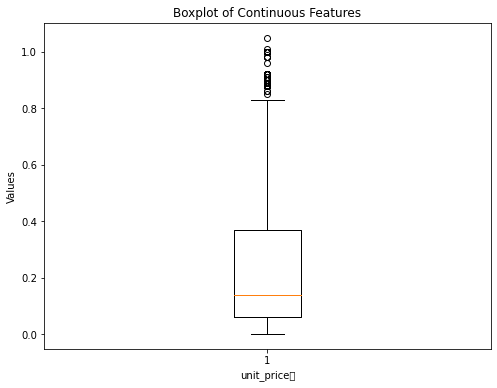

In [213]:
plt.figure(figsize=(8, 6))
plt.boxplot(dta15_for_boxplot.iloc[:, 1]);
plt.title('Boxplot of Continuous Features')
plt.xlabel('unit_price	')
plt.ylabel('Values')
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 9 missing from current font.

C:\Users\Lenovo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:

Glyph 9 missing from current font.



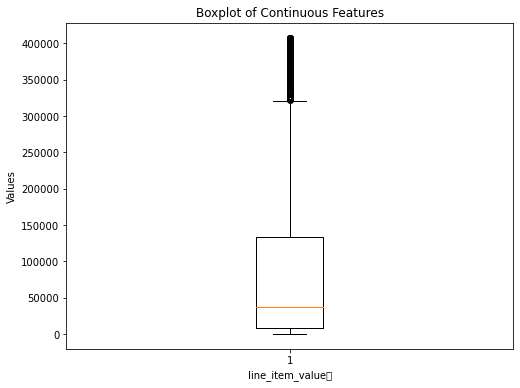

In [214]:
plt.figure(figsize=(8, 6))
plt.boxplot(dta15_for_boxplot.iloc[:, 0]);
plt.title('Boxplot of Continuous Features')
plt.xlabel('line_item_value	')
plt.ylabel('Values')
plt.show()

## Missing Values

##### Step 19: _Dealing with missing values_

In [27]:
for i in range(0,dta15.shape[1]):
    print('feature {}: NaN: {}'.format(dta15.columns[i],sum(dta15.iloc[:,i].isna())))

feature country: NaN: 0
feature fulfill via: NaN: 0
feature vendor inco term: NaN: 0
feature shipment mode: NaN: 360
feature ARV: NaN: 0
feature for Adult: NaN: 0
feature vendor: NaN: 0
feature molecule/test type: NaN: 0
feature dosage form: NaN: 0
feature manufacturing site: NaN: 0
feature On time: NaN: 0
feature line_item_value: NaN: 1127
feature unit_price: NaN: 880
feature weight: NaN: 4575
feature freight_cost: NaN: 4514
feature line_item_insurance: NaN: 287


##### Missing Values are:
feature shipment mode: NaN: 360

feature line_item_value: NaN: 1127

feature weight: NaN: 4575

feature unit_price: NaN: 880

feature line item insurance (usd): NaN: 287

feature freight_cost: NaN: 4514


##### weight (kilograms)

In [93]:
mean_=dta15[~pd.isna(dta15.loc[:, 'weight'])].loc[:,'weight'].mean()
nan_rows = pd.isna(dta15.loc[:, 'weight'])
dta15.loc[nan_rows,'weight'] = mean_

or: 

In [28]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy='mean')
feature_12 = dta15.loc[:, 'weight'].values.reshape(-1, 1)
dta15.loc[:,'weight'] = imputer.fit_transform(feature_12)

##### line item insurance (usd)

In [29]:
imputer = SimpleImputer(strategy='mean')
feature_15 = dta15.loc[:, 'line_item_insurance'].values.reshape(-1, 1)
dta15.loc[:, 'line_item_insurance'] = imputer.fit_transform(feature_15)

##### shipment mode

In [30]:
imputer = SimpleImputer(strategy= 'most_frequent')
dta15.loc[:, 'shipment mode'] = imputer.fit_transform(dta15.loc[:, 'shipment mode'].values.reshape(-1,1))

##### freight cost (usd)

In [31]:
# from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=4, weights="uniform")
dta15['freight_cost'] = imputer.fit_transform(dta15['freight_cost'].values.reshape(-1, 1))

##### line_item_value

In [32]:
# from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy='median') 
feature_ = dta15.loc[:, 'line_item_value'].values.reshape(-1, 1)
dta15.loc[:,'line_item_value'] = imputer.fit_transform(feature_)

##### Unit price

In [33]:
# from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy='median')
feature_ = dta15.loc[:, 'unit_price'].values.reshape(-1, 1)
dta15.loc[:,'unit_price'] = imputer.fit_transform(feature_)

In [34]:
for i in range(0,dta15.shape[1]):
    print('feature {}: NaN: {}'.format(dta15.columns[i],sum(dta15.iloc[:,i].isna())))

feature country: NaN: 0
feature fulfill via: NaN: 0
feature vendor inco term: NaN: 0
feature shipment mode: NaN: 0
feature ARV: NaN: 0
feature for Adult: NaN: 0
feature vendor: NaN: 0
feature molecule/test type: NaN: 0
feature dosage form: NaN: 0
feature manufacturing site: NaN: 0
feature On time: NaN: 0
feature line_item_value: NaN: 0
feature unit_price: NaN: 0
feature weight: NaN: 0
feature freight_cost: NaN: 0
feature line_item_insurance: NaN: 0


In [76]:
dta15.head()

,country,fulfill via,vendor inco term,shipment mode,ARV,for Adult,vendor,molecule/test type,dosage form,line item value,unit price,manufacturing site,weight (kilograms),freight cost (usd),line item insurance (usd),On time
0,Côte d'Ivoire,Direct Drop,EXW,Air,0,others,others,others,Test kit,551.0,others,Ranbaxy Fine Chemicals LTD,13.0,780.34,240.117626,1.0
1,others,Direct Drop,EXW,Air,1,others,others,others,Oral suspension,6200.0,others,"Aurobindo Unit III, India",358.0,4521.50,240.117626,1.0
2,Côte d'Ivoire,Direct Drop,FCA,Air,0,others,others,others,Test kit,40000.0,others,ABBVIE GmbH & Co.KG Wiesbaden,171.0,1653.78,240.117626,1.0
3,others,Direct Drop,EXW,Air,1,others,others,others,Tablet,127360.8,others,"Ranbaxy, Paonta Shahib, India",1855.0,16007.06,240.117626,1.0
4,others,Direct Drop,EXW,Air,1,others,others,others,Capsule,121600.0,others,"Aurobindo Unit III, India",7590.0,45450.08,240.117626,1.0


In [231]:
dta15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10324 entries, 0 to 10323
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              10324 non-null  object 
 1   fulfill via          10324 non-null  object 
 2   vendor inco term     10324 non-null  object 
 3   shipment mode        10324 non-null  object 
 4   ARV                  10324 non-null  object 
 5   for Adult            10324 non-null  object 
 6   vendor               10324 non-null  object 
 7   molecule/test type   10324 non-null  object 
 8   dosage form          10324 non-null  object 
 9   manufacturing site   10324 non-null  object 
 10  On time              10324 non-null  float64
 11  line_item_value      10324 non-null  float64
 12  unit_price           10324 non-null  float64
 13  weight               10324 non-null  float64
 14  freight_cost         10324 non-null  float64
 15  line_item_insurance  10324 non-null  floa

In [35]:
target_var=dta15.iloc[:, 10 ]
categorical_data=dta15.iloc[:,np.arange(10)]
numerical_data=dta15.iloc[:,np.arange(11,16)]

In [38]:
 dta15.iloc[:,[10, 11, 12, 13, 14, 15]]

,On time,line_item_value,unit_price,weight,freight_cost,line_item_insurance
0,1.0,551.00,0.97,13.000000,780.340000,240.117626
1,1.0,6200.00,0.03,358.000000,4521.500000,240.117626
2,1.0,40000.00,0.80,171.000000,1653.780000,240.117626
3,1.0,127360.80,0.07,1855.000000,16007.060000,240.117626
4,1.0,121600.00,0.05,7590.000000,8061.305084,240.117626
...,...,...,...,...,...,...
10319,1.0,21000.00,0.06,1586.083319,8061.305084,705.790000
10320,0.0,137389.44,0.11,1586.083319,8061.305084,161.710000
10321,1.0,21000.00,0.33,1586.083319,8061.305084,5284.040000
10322,1.0,113871.80,0.11,1392.000000,8061.305084,134.030000


In [102]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical_features', MinMaxScaler(), dta15.columns[10:16] ),
        ('categorical_features', OneHotEncoder(sparse_output=False),dta15.columns[ 0:10])])
preprocessor.fit(dta15)
dta15_transformed= pd.DataFrame(preprocessor.transform(dta15))

In [113]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical_features', MinMaxScaler(), dta15.columns[11:16] ),
        ('categorical_features', OneHotEncoder(sparse_output=False),dta15.columns[ 0:10])])

preprocessor.fit(X_train)
transformedddd= pd.DataFrame(preprocessor.transform(X_train))

In [114]:
transformedddd

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,0.051368,0.200000,0.601927,0.852294,0.105701,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.019569,0.133333,0.011012,0.122114,0.002034,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.499614,0.085714,0.414591,0.158640,0.043720,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005995,0.085714,0.005006,0.012897,0.000524,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.003366,0.133333,0.001877,0.012403,0.000250,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7221,0.037327,0.161905,0.198484,0.246288,0.003880,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7222,0.569126,0.133333,0.039795,0.184091,0.049803,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7223,0.051368,0.304762,0.198484,0.246288,0.373744,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7224,0.129107,0.085714,0.127769,0.159370,0.011298,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [116]:
X_train

,country,fulfill via,vendor inco term,shipment mode,ARV,for Adult,vendor,molecule/test type,dosage form,manufacturing site,line_item_value,unit_price,weight,freight_cost,line_item_insurance
2843,Rwanda,Direct Drop,EXW,Air,1,1,MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORA...,Abacavir,Tablet,Mylan (formerly Matrix) Nashik,21000.00,0.21,4810.000000,27894.810000,814.79
5476,Rwanda,Direct Drop,EXW,Air,0,0,"Trinity Biotech, Plc","HIV 1/2, Uni-Gold HIV Kit",Test kit,"Trinity Biotech, Plc",8000.00,0.14,88.000000,3997.310000,15.68
4490,South Africa,Direct Drop,DDP,Ocean,1,0,Aurobindo Pharma Limited,Efavirenz,Capsule,"Aurobindo Unit III, India",204250.00,0.09,3313.000000,5192.740000,337.01
3479,South Africa,Direct Drop,DDP,Ocean,1,0,Aurobindo Pharma Limited,Efavirenz,Capsule,"Aurobindo Unit III, India",2451.00,0.09,40.000000,422.840000,4.04
4526,others,Direct Drop,EXW,Air,0,0,"Trinity Biotech, Plc","HIV 1/2, Uni-Gold HIV Kit",Test kit,"Trinity Biotech, Plc",1376.00,0.14,15.000000,406.680000,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,Haiti,From RDC,N/A - From RDC,Air,1,0,SCMS from RDC,Efavirenz,Capsule,"Aurobindo Unit III, India",15260.00,0.17,1586.083319,8061.305084,29.91
7650,Mozambique,From RDC,N/A - From RDC,Truck,1,1,SCMS from RDC,Lamivudine/Zidovudine,Tablet - FDC,others,232667.68,0.14,318.000000,6025.730000,383.90
9824,Nigeria,From RDC,N/A - From RDC,Air Charter,1,1,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Tablet - FDC,Hetero Unit III Hyderabad IN,21000.00,0.32,1586.083319,8061.305084,2880.98
7186,Zimbabwe,From RDC,N/A - From RDC,Truck,1,1,SCMS from RDC,Lamivudine/Nevirapine/Stavudine,Tablet - FDC,"Cipla, Goa, India",52781.08,0.09,1021.000000,5216.630000,87.09


In [117]:
y_train

2843    1.0
5476    1.0
4490    1.0
3479    1.0
4526    1.0
       ... 
1371    1.0
7650    0.0
9824    1.0
7186    1.0
1197    1.0
Name: On time, Length: 7226, dtype: float64

##### Step 20: _correlation Analysis for numeric variables_

In [54]:
corr_table1 = round( numerical_data.corr(method = 'pearson'), 2)
corr_table1

,line_item_value,unit_price,weight,freight_cost,line_item_insurance
line_item_value,1.00,0.14,0.32,0.30,0.15
unit_price,0.14,1.00,-0.08,0.09,0.13
weight,0.32,-0.08,1.00,0.43,0.27
freight_cost,0.30,0.09,0.43,1.00,0.26
line_item_insurance,0.15,0.13,0.27,0.26,1.00


In [58]:
# dta15.to_csv("C:/Users/Lenovo/Desktop/Dta for LOGREG.csv")

# MODELING


##### Step 21: _Defining features and response variable_

In [36]:
X = pd.concat([categorical_data,numerical_data],axis=1)  # Features
y =target_var       # response variable

##### Step 22: _importing required libraries_

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

##### Step 23: _deviding train/test_

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)

##### Step 24: _Modeling:_

In [38]:
X_train.columns
numerical_data.columns

Index(['line_item_value', 'unit_price', 'weight', 'freight_cost',
       'line_item_insurance'],
      dtype='object')

In [39]:
numerical_features =  [
    'line_item_value', 'unit_price', 'weight', 'freight_cost',
       'line_item_insurance'
]
categorical_features =  [
    'country', 'fulfill via', 'vendor inco term', 'shipment mode', 'ARV',
       'for Adult', 'vendor', 'molecule/test type', 'dosage form',
       'manufacturing site'
                        ]

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical_features', MinMaxScaler(), numerical_features),
        ('categorical_features', OneHotEncoder(sparse_output=False), categorical_features),
        ])
# ('other', 'passthrough', X.columns.difference(numerical_features).difference(categorical_features))
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())])
parameters = {
    'classifier__n_neighbors':[3, 4, 5, 6, 7, 8, 9, 10],
    'classifier__p': [1, 2, 3],
    'classifier__weights': ['uniform','distance']} 

grid_search_KNN = GridSearchCV(model, parameters, cv=3,scoring='accuracy').fit(X_train, y_train)

In [271]:
print("Best Parameters: ", grid_search_KNN.best_params_) 
print("Best Accuracy: ", grid_search_KNN.best_score_)#mean cross-validated score of the best_estimator

Best Parameters:  {'classifier__n_neighbors': 9, 'classifier__p': 3, 'classifier__weights': 'uniform'}
Best Accuracy:  0.8811237919632312


In [43]:
categorical_features =  ['country', 'fulfill via', 'vendor inco term', 'shipment mode', 'ARV',
                         'for Adult', 'vendor', 'molecule/test type', 'dosage form', 'manufacturing site']
numerical_features = X.columns.difference(categorical_features)
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical_features', MinMaxScaler(), numerical_features),
        ('categorical_features', OneHotEncoder(sparse_output=False), categorical_features),
    ])
model_KNN = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=9, p=3, weights='uniform'))  # Specify parameters here
])
model_KNN.fit(X_train, y_train)
y_pred_KNN = model_KNN.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_KNN)
precision = precision_score(y_test, y_pred_KNN, average='weighted')
recall = recall_score(y_test, y_pred_KNN, average='weighted')
f1 = f1_score(y_test, y_pred_KNN, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8724983860555197
Precision: 0.8263163055470871
Recall: 0.8724983860555197
F1 Score: 0.8409822681864503


### KNN- Predict On Test Dataset, Accurcay:

In [42]:
y_pred_KNN=grid_search_KNN.predict(X_test) 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_KNN)
print("Accuracy:", accuracy)

Accuracy: 0.8724983860555197


Prediction by the best KNN

In [ ]:
categorical_features =  ['country', 'fulfill via', 'vendor inco term', 'shipment mode', 'ARV',
                         'for Adult', 'vendor', 'molecule/test type', 'dosage form', 'manufacturing site']
numerical_features = X.columns.difference(categorical_features)
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical_features', MinMaxScaler(), numerical_features),
        ('categorical_features', OneHotEncoder(sparse_output=False), categorical_features),
    ])
model_KNN = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=9, p=3, weights='uniform'))  # Specify parameters here
])
model.fit(X_train, y_train)
y_pred_KNN = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_KNN)
precision = precision_score(y_test, y_pred_KNN, average='weighted')
recall = recall_score(y_test, y_pred_KNN, average='weighted')
f1 = f1_score(y_test, y_pred_KNN, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


# SVM

In [48]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [256]:
numerical_features =  [
    'line_item_value', 'unit_price', 'weight', 'freight_cost',
       'line_item_insurance'
]
categorical_features =  [
    'country', 'fulfill via', 'vendor inco term', 'shipment mode', 'ARV',
       'for Adult', 'vendor', 'molecule/test type', 'dosage form',
       'manufacturing site'
                        ]
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical_features', StandardScaler(), numerical_features),
        ('categorical_features', OneHotEncoder(sparse_output=False), categorical_features),
        ])
svm_estimator_model = Pipeline([
    ('preprocessor', preprocessor),
    ('svc',SVC())  ])
parameters = {'svc__C': [0.001, 0.01, 0.1, 1, 10],'svc__gamma': [0.001, 0.01, 0.1, 1, 10]}

In [257]:
from sklearn.model_selection import GridSearchCV
grid_cv_SVM = GridSearchCV(svm_estimator_model, param_grid=parameters, cv=5)
grid_cv_SVM.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical_features',
                                                                         StandardScaler(),
                                                                         ['line_item_value',
                                                                          'unit_price',
                                                                          'weight',
                                                                          'freight_cost',
                                                                          'line_item_insurance']),
                                                                        ('categorical_features',
                                                                         OneHotEncoder(sparse_output=False),
                                                                         ['country',
                                                                          'fulfill '
                                                                          'via',
                                                                          'vendor '
                                                                          'inco '
                                                                          'term',
                                                                          'shipment '
                                                                          'mode',
                                                                          'ARV',
                                                                          'for '
                                                                          'Adult',
                                                                          'vendor',
                                                                          'molecule/test '
                                                                          'type',
                                                                          'dosage '
                                                                          'form',
                                                                          'manufacturing '
                                                                          'site'])])),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10]})

In [259]:
grid_cv_SVM.best_params_

{'svc__C': 1, 'svc__gamma': 0.1}

In [261]:
grid_cv_SVM.best_score_

0.8862440714630984

In [ ]:
Prediction by the best SVM

categorical_features =  [
    'country', 'fulfill via', 'vendor inco term', 'shipment mode', 'ARV',
       'for Adult', 'vendor', 'molecule/test type', 'dosage form',
       'manufacturing site'
                        ]
numerical_features = X.columns.difference(categorical_features)
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical_features', StandardScaler(), numerical_features),
        ('categorical_features', OneHotEncoder(sparse_output=False), categorical_features),
        ])
model_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('svc',SVC(C=1,gamma=0.1))  ])

model_svm.fit(X_train, y_train)
y_pred_SVM = model_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_SVM)
precision = precision_score(y_test, y_pred_SVM, average='weighted')
recall = recall_score(y_test, y_pred_SVM, average='weighted')
f1 = f1_score(y_test, y_pred_SVM, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

### SVM- Predict On Test Dataset, Accurcay:

In [ ]:
y_pred_SVM=grid_cv_SVM.predict(X_test) 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_SVM)
print("Accuracy:", accuracy)

Prediction by the best SVM

In [ ]:
categorical_features =  [
    'country', 'fulfill via', 'vendor inco term', 'shipment mode', 'ARV',
       'for Adult', 'vendor', 'molecule/test type', 'dosage form',
       'manufacturing site'
                        ]
numerical_features = X.columns.difference(categorical_features)
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical_features', StandardScaler(), numerical_features),
        ('categorical_features', OneHotEncoder(sparse_output=False), categorical_features),
        ])
model_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('svc',SVC(C=1,gamma=0.1))  ])

model_svm.fit(X_train, y_train)
y_pred_SVM = model_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_SVM)
precision = precision_score(y_test, y_pred_SVM, average='weighted')
recall = recall_score(y_test, y_pred_SVM, average='weighted')
f1 = f1_score(y_test, y_pred_SVM, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

## DT

In [293]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [294]:
numerical_f =  [
    'line_item_value', 'unit_price', 'weight', 'freight_cost',
       'line_item_insurance'
]
categorical_f =  [
    'country', 'fulfill via', 'vendor inco term', 'shipment mode', 'ARV',
       'for Adult', 'vendor', 'molecule/test type', 'dosage form',
       'manufacturing site']
preprocessor = ColumnTransformer(
                transformers=[
                ('for numerical_f',MinMaxScaler(), numerical_f ),
                ('for categorical_f',OneHotEncoder(), categorical_f)
                ]) 
dt_model = Pipeline([
    ('preprocessor', preprocessor),
    ('dt',DecisionTreeClassifier())  ])
parameters = {
    'dt__criterion': ['gini', 'entropy'], 
    'dt__max_depth': [5, 10, 15, 20],     
    'dt__min_samples_leaf': [5, 10, 20]  }  
grid_DT= GridSearchCV(dt_model, param_grid=parameters, cv=5)
grid_DT.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('for '
                                                                         'numerical_f',
                                                                         MinMaxScaler(),
                                                                         ['line_item_value',
                                                                          'unit_price',
                                                                          'weight',
                                                                          'freight_cost',
                                                                          'line_item_insurance']),
                                                                        ('for '
                                                                         'categorical_f',
                                                                         OneHotEncoder(),
                                                                         ['country',
                                                                          'fulfill '
                                                                          'via',
                                                                          'vendor '
                                                                          'inco '
                                                                          'term',
                                                                          'shipment '
                                                                          'mode',
                                                                          'ARV',
                                                                          'for '
                                                                          'Adult',
                                                                          'vendor',
                                                                          'molecule/test '
                                                                          'type',
                                                                          'dosage '
                                                                          'form',
                                                                          'manufacturing '
                                                                          'site'])])),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [5, 10, 15, 20],
                         'dt__min_samples_leaf': [5, 10, 20]})

In [295]:
grid_DT.best_params_

{'dt__criterion': 'gini', 'dt__max_depth': 5, 'dt__min_samples_leaf': 20}

In [296]:
grid_DT.best_score_

0.8847217715497232

In [297]:
y_pred_DT=grid_DT.predict(X_test) 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_DT)
print("Accuracy:", accuracy)

Accuracy: 0.8783085861846353


Prediction by the best tree

In [49]:
categorical_f =  [
    'country', 'fulfill via', 'vendor inco term', 'shipment mode', 'ARV',
       'for Adult', 'vendor', 'molecule/test type', 'dosage form',
       'manufacturing site']
numerical_f = X.columns.difference(categorical_features)
preprocessor = ColumnTransformer(
                transformers=[
                ('for numerical_f',MinMaxScaler(), numerical_f ),
                ('for categorical_f',OneHotEncoder(), categorical_f)
                ]) 
model_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('dt',DecisionTreeClassifier(criterion='gini', max_depth= 5, min_samples_leaf=20))  ])
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8783085861846353
Precision: 0.8265131721103125
Recall: 0.8783085861846353
F1 Score: 0.839317331307229


### naive_bayes 

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
from sklearn.naive_bayes import GaussianNB

numerical_features = ['line_item_value', 'unit_price', 'weight', 'freight_cost', 'line_item_insurance']
categorical_features = ['country', 'fulfill via', 'vendor inco term', 'shipment mode', 'ARV',
                         'for Adult', 'vendor', 'molecule/test type', 'dosage form', 'manufacturing site']
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical_features', StandardScaler(), numerical_features),
        ('categorical_features', OneHotEncoder(sparse=False), categorical_features),
    ])
nb_model = Pipeline([     ('preprocessor', preprocessor),
    ('nb', GaussianNB())])
nb_model.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_features',
                                                  StandardScaler(),
                                                  ['line_item_value',
                                                   'unit_price', 'weight',
                                                   'freight_cost',
                                                   'line_item_insurance']),
                                                 ('categorical_features',
                                                  OneHotEncoder(sparse=False),
                                                  ['country', 'fulfill via',
                                                   'vendor inco term',
                                                   'shipment mode', 'ARV',
                                                   'for Adult', 'vendor',
                                                   'molecule/test type',
                                                   'dosage form',
                                                   'manufacturing site'])])),
                ('nb', GaussianNB())])

In [60]:
accuracy = accuracy_score(y_train, nb_model.predict(X_train))
print('Accuracy: ',accuracy)

Accuracy:  0.39302518682535287


prediction by NB

In [51]:
nb_model.fit(X_train, y_train)

y_pred_NB = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_NB)
precision = precision_score(y_test, y_pred_NB, average='weighted')
recall = recall_score(y_test, y_pred_NB, average='weighted')
f1 = f1_score(y_test, y_pred_NB, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.3705616526791478
Precision: 0.8915798230303468
Recall: 0.3705616526791478
F1 Score: 0.4295579985254691


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1269856)
nb_model.fit(X_train, y_train)
accuracy = accuracy_score(y_train, nb_model.predict(X_train))
print('Accuracy: ',accuracy)

Accuracy:  0.374896208137282


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### RandomForest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
numerical_features = ['line_item_value', 'unit_price', 'weight', 'freight_cost', 'line_item_insurance']
categorical_features = ['country', 'fulfill via', 'vendor inco term', 'shipment mode', 'ARV',
                         'for Adult', 'vendor', 'molecule/test type', 'dosage form', 'manufacturing site']
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical_features', StandardScaler(), numerical_features),
        ('categorical_features', OneHotEncoder(sparse=False), categorical_features),])
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=42))
])
parameters = {
    'rf__n_estimators': [100, 200, 300],  
    'rf__max_depth': [None, 10],       
    'rf__min_samples_split': [2, 7, 10], 
    'rf__min_samples_leaf': [ 2, 4]    }

grid_search_RF= GridSearchCV(rf_model, parameters, cv=5, scoring='accuracy')
grid_search_RF.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_features',
                                                  StandardScaler(),
                                                  ['line_item_value',
                                                   'unit_price', 'weight',
                                                   'freight_cost',
                                                   'line_item_insurance']),
                                                 ('categorical_features',
                                                  OneHotEncoder(sparse=False),
                                                  ['country', 'fulfill via',
                                                   'vendor inco term',
                                                   'shipment mode', 'ARV',
                                                   'for Adult', 'vendor',
                                                   'molecule/test type',
                                                   'dosage form',
                                                   'manufacturing site'])])),
                ('rf', RandomForestClassifier(random_state=42))])

In [385]:
# accuracy_score(y_train, rf_model.predict(X_train)) 0.9982009410462219

0.9982009410462219

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
rf_model.fit(X_train, y_train)
accuracy_score(y_train, rf_model.predict(X_train))

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.9977857735953501

In [56]:
accuracy_score(y_train, rf_model.predict(X_train))

0.9982009410462219

In [396]:
y_pred = rf_model.predict(X_test)
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy=',accuracy)

Accuracy= 0.881213686249193


In [76]:
 grid_search_RF.best_params_

{'rf__max_depth': 10,
 'rf__min_samples_leaf': 2,
 'rf__min_samples_split': 10,
 'rf__n_estimators': 200}

In [55]:
categorical_f =  [
    'country', 'fulfill via', 'vendor inco term', 'shipment mode', 'ARV',
       'for Adult', 'vendor', 'molecule/test type', 'dosage form',
       'manufacturing site']
numerical_f = X.columns.difference(categorical_features)
preprocessor = ColumnTransformer(
                transformers=[
                ('for numerical_f',MinMaxScaler(), numerical_f ),
                ('for categorical_f',OneHotEncoder(), categorical_f)
                ]) 
model_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('dt',RandomForestClassifier(
        max_depth=10,min_samples_leaf=2,min_samples_split=10,n_estimators=200 ))  ])
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8837959974176889
Precision: 0.8224352856727055
Recall: 0.8837959974176889
F1 Score: 0.8329127506362681
